<a href="https://colab.research.google.com/github/tishakbhavsar/practising-pytorch/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Jul  3 02:52:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Image classification
2. Object Detection
3. Object Segmentation

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning is when a model "memorizes" the training data, that is it performs well on the training data but not on the validation/test data, which means it fails to overgeneralize the patterns learned to larger dataset.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. To prevent overfitting, use cross validation to check for validation accuracy.
2. We can use dropout neurons (dropout) and even regularization which basically means applying a penalty on model results.
3. Increasing training data.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor(),target_transform=None)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor(),target_transform=None)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

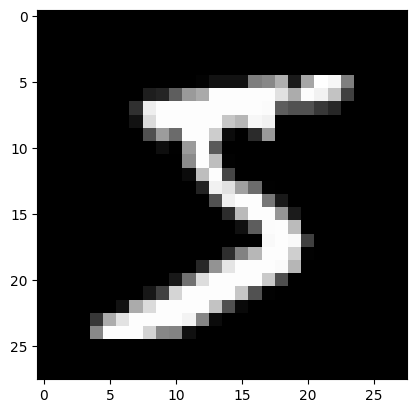

In [4]:
import matplotlib.pyplot as plt
import random

img, label = train_data[0]
plt.imshow(img.squeeze(), cmap="gray");

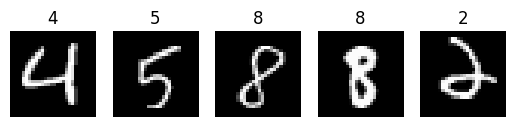

In [5]:
random_samples = []
for i in range(5):
  random_samples.append(random.randint(0,len(train_data)-1))
for index in range(len(random_samples)):
  img, label = train_data[random_samples[index]]
  plt.subplot(1,5, index+1)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
class MNISTModel(nn.Module):
  def __init__(self, input_shape:int, output_shape:int, hidden_units):
    super().__init__()
    self.conv_block = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )
  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block(x)))

In [8]:
model_2 = MNISTModel(input_shape=1, output_shape=10, hidden_units=10).to(device)
model_2

MNISTModel(
  (conv_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [9]:
!pip install torchmetrics

In [10]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

class_names = train_data.classes
accuracy_fn = Accuracy(num_classes=len(class_names), task="multiclass").to(device)

In [11]:
from timeit import default_timer as timer
def train_time(start_time: float, end_time: float, device: str):
  total_time = end_time - start_time
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [12]:
def train_step(model: nn.Module,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               data_loader: torch.utils.data.DataLoader,
               device: torch.device,
               accuracy_fn):
  model.train()
  model.to(device)
  train_loss, train_acc = 0,0
  for batch, (X,y) in tqdm(enumerate(data_loader), "Training data..."):
    X, y = X.to(device), y.to(device)
    y_logits = model(X)
    y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    loss = loss_fn(y_logits,y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss:{train_loss:.5f} | Train accuracy: {train_acc:.5f}')

def test_step(model: nn.Module,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               data_loader: torch.utils.data.DataLoader,
               device: torch.device,
               accuracy_fn):
  model.eval()
  model.to(device)
  test_loss, test_acc = 0,0
  for batch, (X,y) in tqdm(enumerate(data_loader), "Testing data..."):
    X, y = X.to(device), y.to(device)
    test_logits = model(X)
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
    test_loss += loss_fn(test_logits,y)
    test_acc += accuracy_fn(test_pred, y)
  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f'Test loss:{test_loss:.5f} | Test accuracy: {test_acc:.5f}')



In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

### Traing on GPU

In [14]:
device

'cuda'

In [15]:
epochs = 5
start_time_gpu = timer()

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             data_loader = train_dataloader,
             device = device,
             accuracy_fn=accuracy_fn)
  test_step(model=model_2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             data_loader = test_dataloader,
             device = device,
             accuracy_fn=accuracy_fn)
end_time_gpu = timer()
total_gpu_time = train_time(start_time=start_time_gpu, end_time=end_time_gpu, device=device)


Epoch: 0
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.27998 | Train accuracy: 0.90632


Testing data...: 0it [00:00, ?it/s]

Test loss:0.06694 | Test accuracy: 0.97893
Epoch: 1
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.07320 | Train accuracy: 0.97683


Testing data...: 0it [00:00, ?it/s]

Test loss:0.05359 | Test accuracy: 0.98123
Epoch: 2
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.05708 | Train accuracy: 0.98247


Testing data...: 0it [00:00, ?it/s]

Test loss:0.04566 | Test accuracy: 0.98492
Epoch: 3
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.04874 | Train accuracy: 0.98465


Testing data...: 0it [00:00, ?it/s]

Test loss:0.04692 | Test accuracy: 0.98532
Epoch: 4
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.04228 | Train accuracy: 0.98635


Testing data...: 0it [00:00, ?it/s]

Test loss:0.04013 | Test accuracy: 0.98792
Train time on cuda: 73.030 seconds


### Training on CPU

In [16]:
model_3 = MNISTModel(input_shape=1, output_shape=10, hidden_units=10).to("cpu")

In [17]:
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [18]:
accuracy_fn_cpu = Accuracy(num_classes=10, task='multiclass').to('cpu')


In [19]:
epochs = 5
start_time_cpu = timer()

for epoch in range(epochs):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_3,
             loss_fn = loss_fn,
             optimizer = optimizer,
             data_loader = train_dataloader,
             device = "cpu",
             accuracy_fn=accuracy_fn_cpu)
  test_step(model=model_3,
             loss_fn = loss_fn,
             optimizer = optimizer,
             data_loader = test_dataloader,
             device = "cpu",
             accuracy_fn=accuracy_fn_cpu)
end_time_cpu = timer()
total_cpu_time = train_time(start_time=start_time_cpu, end_time=end_time_cpu, device="cpu")


Epoch: 0
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.39971 | Train accuracy: 0.86123


Testing data...: 0it [00:00, ?it/s]

Test loss:0.08373 | Test accuracy: 0.97214
Epoch: 1
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.07572 | Train accuracy: 0.97698


Testing data...: 0it [00:00, ?it/s]

Test loss:0.05748 | Test accuracy: 0.98143
Epoch: 2
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.05675 | Train accuracy: 0.98257


Testing data...: 0it [00:00, ?it/s]

Test loss:0.05796 | Test accuracy: 0.98053
Epoch: 3
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.04903 | Train accuracy: 0.98447


Testing data...: 0it [00:00, ?it/s]

Test loss:0.04432 | Test accuracy: 0.98482
Epoch: 4
-------


Training data...: 0it [00:00, ?it/s]

Train loss:0.04320 | Train accuracy: 0.98617


Testing data...: 0it [00:00, ?it/s]

Test loss:0.04005 | Test accuracy: 0.98692
Train time on cpu: 192.160 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [53]:
X, y = next(iter(test_dataloader))
X, y = X.to(device), y.to(device)
with torch.inference_mode():
  y_logits = model_2(X)
  y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

In [56]:
random.seed(0)
torch.manual_seed(42)
random_samples = []
for i in range(5):
  random_samples.append(random.randint(0,31))
random_samples


tensor(4, device='cuda:0')

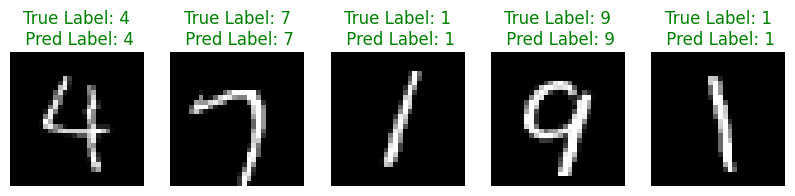

In [73]:
true_labels = []
plt.figure(figsize=(10,5))
for index in range(len(random_samples)):
  img, label = test_data[random_samples[index]]
  plt.subplot(1,5, index+1)
  true_labels.append(label)
  plt.imshow(img.squeeze(), cmap="gray")
  title = f'True Label: {label}\n Pred Label: {y_pred.squeeze()[random_samples[index]]}'
  if label == y_pred.squeeze()[random_samples[index]]:
    title = f'True Label: {label}\n Pred Label: {y_pred.squeeze()[random_samples[index]]}'
    plt.title(title, color='green')
  else:
    title = f'True Label: {label}\n Pred Label: {y_pred.squeeze()[random_samples[index]]}'
    plt.title(title, color='red')
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [88]:
# predict for all
y_preds = []
model_2.eval()
for batch, (X,y) in tqdm(enumerate(test_dataloader), "Testing data..."):
  X, y = X.to(device), y.to(device)
  test_logits = model_2(X)
  test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
  y_preds.append(test_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Testing data...: 0it [00:00, ?it/s]

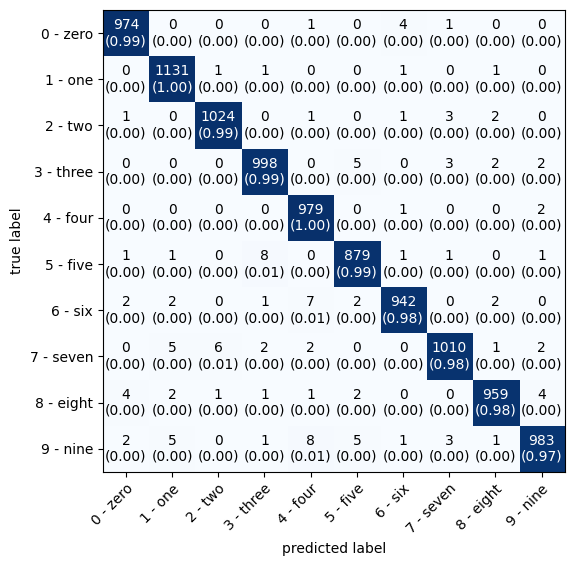

In [91]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix


cm = ConfusionMatrix(num_classes=10, task='multiclass')
cm_tensor = cm(preds=y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=cm_tensor.numpy(),
    figsize=(6,6),
    class_names=class_names,
    show_normed=True
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [104]:
random_tensor = torch.randn([1,3,64,64])
random_tensor.shape
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, padding=1, stride=2)
output = conv_layer(random_tensor)
output.shape

torch.Size([1, 10, 32, 32])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

I think its a data error!